In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
components = ['default','student','balance','income']
data1 = pd.read_csv(r'C:\Users\Rohit\Desktop\Default.csv',header=0,names=components)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


In [3]:
data1.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [4]:
feature_coloumn = ['balance','income']
X = data1[feature_coloumn]
y = data1.default

In [5]:
print(X)

           balance        income
1       729.526495  44361.625074
2       817.180407  12106.134700
3      1073.549164  31767.138947
4       529.250605  35704.493935
5       785.655883  38463.495879
...            ...           ...
9996    711.555020  52992.378914
9997    757.962918  19660.721768
9998    845.411989  58636.156984
9999   1569.009053  36669.112365
10000   200.922183  16862.952321

[10000 rows x 2 columns]


In [6]:
print(y)

1        No
2        No
3        No
4        No
5        No
         ..
9996     No
9997     No
9998     No
9999     No
10000    No
Name: default, Length: 10000, dtype: object


In [7]:
# 3 Random slpits of data
import numpy as np
X,y = X[:10000],y[:10000]
shuffle_index = np.random.permutation(10000)
X,y = X.iloc[shuffle_index],y.iloc[shuffle_index]

In [8]:
print(X)

          balance        income
9158   184.887298  49716.020405
7784   724.537790  33254.528495
642   1531.716459  43930.400096
7983  1592.549635  18024.281720
2970  1393.368283  38371.977462
...           ...           ...
8456   620.457309  41059.096502
7573   463.045456  35621.080350
9963  1635.175122  13518.930622
9615   456.373019  47633.785444
7557   789.639900  44073.246693

[10000 rows x 2 columns]


In [9]:
print(y)

9158     No
7784     No
642     Yes
7983     No
2970     No
       ... 
8456     No
7573     No
9963     No
9615     No
7557     No
Name: default, Length: 10000, dtype: object


In [10]:
X1,y1,X2,y2,X3,y3 = X[:3000],y[:3000],X[3000:7000],y[3000:7000],X[7000:10000],y[7000:10000]

In [11]:
print(y3)

9465    No
3700    No
2481    No
7725    No
2382    No
        ..
8456    No
7573    No
9963    No
9615    No
7557    No
Name: default, Length: 3000, dtype: object


#  Validation Interation Index-1

In [12]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.5,random_state=0)

In [13]:
print(X1_train)

          balance        income
7240   705.996772  53423.149801
742    613.656318  25040.488453
4913   908.926548  40757.094123
4276   236.338466  39260.060191
3891   824.995490  34277.525897
...           ...           ...
5149  1654.934175  33179.783923
277   1362.965595  44217.916035
3733   413.858825  42453.681875
599    696.014431  40741.420240
1872   220.368958  24019.310560

[1500 rows x 2 columns]


In [14]:
logisticRe = LogisticRegression()
logisticRe.fit(X1_train,y1_train)

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y1_pred = logisticRe.predict(X1_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(y1_test, y1_pred))
print("Classification report:\n",classification_report(y1_test, y1_pred))

Confusion Matrix:
 [[1457    3]
 [  39    1]]
Classification report:
               precision    recall  f1-score   support

          No       0.97      1.00      0.99      1460
         Yes       0.25      0.03      0.05        40

    accuracy                           0.97      1500
   macro avg       0.61      0.51      0.52      1500
weighted avg       0.95      0.97      0.96      1500



In [17]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
y1_pred[y1_pred == 'Yes'] = 1
y1_pred[y1_pred == 'No'] = 0
y1_test[y1_test == 'Yes'] = 1
y1_test[y1_test == 'No'] = 0
print("\nMSE:",metrics.mean_squared_error(y1_test,y1_pred))

Accuracy: 0.972

MSE: 0.028


# LOOCV interation - 1


In [18]:
from sklearn import model_selection
loocv = model_selection.LeaveOneOut()
model_loocv = LogisticRegression(solver='lbfgs')
results_loocv1 = model_selection.cross_val_score(model_loocv, X1, y1, cv=loocv)
print("Accuracy: %.2f%%" % (results_loocv1.mean()*100.0))

Accuracy: 96.77%


# k-fold cross validation iteration - 1

In [19]:
kfold = model_selection.KFold(n_splits=5, random_state=100)
model_kfold = LogisticRegression()
results_kfold1 = model_selection.cross_val_score(model_kfold, X1, y1, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold1.mean()*100.0)) 

Accuracy: 96.80%


C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

# Validation Interation Index-2

In [20]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.5,random_state=0)

In [21]:
logisticReg1 = LogisticRegression()
logisticReg1.fit(X2_train,y2_train)
y2_pred = logisticReg1.predict(X2_test)
print("Confusion Matrix:\n",confusion_matrix(y2_test, y2_pred))
print("Classification report:\n",classification_report(y2_test, y2_pred))

Confusion Matrix:
 [[1933    0]
 [  67    0]]
Classification report:
               precision    recall  f1-score   support

          No       0.97      1.00      0.98      1933
         Yes       0.00      0.00      0.00        67

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.97      0.95      2000



C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
y2_pred[y2_pred == 'Yes'] = 1
y2_pred[y2_pred == 'No'] = 0
y2_test[y2_test == 'Yes'] = 1
y2_test[y2_test == 'No'] = 0
print("\nMSE:",metrics.mean_squared_error(y2_test,y2_pred))

Accuracy: 0.9665

MSE: 0.0335


# LOOCV interation - 2

In [23]:
from sklearn import model_selection
loocv = model_selection.LeaveOneOut()
model_loocv = LogisticRegression(solver='lbfgs')
results_loocv = model_selection.cross_val_score(model_loocv, X2, y2, cv=loocv)
print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

Accuracy: 96.40%


# k-fold cross validation iteration - 2

In [24]:
kfold = model_selection.KFold(n_splits=5, random_state=100)
model_kfold = LogisticRegression()
results_kfold2 = model_selection.cross_val_score(model_kfold, X2, y2, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold2.mean()*100.0)) 

Accuracy: 96.78%


C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

#  Validation Set interation - 3

In [25]:
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=0.5,random_state=0)

In [26]:
logisticReg2 = LogisticRegression()
logisticReg2.fit(X3_train,y3_train)
y3_pred = logisticReg2.predict(X3_test)
print("Confusion Matrix:\n",confusion_matrix(y3_test, y3_pred))
print("Classification report:\n",classification_report(y3_test, y3_pred))

Confusion Matrix:
 [[1452    1]
 [  47    0]]
Classification report:
               precision    recall  f1-score   support

          No       0.97      1.00      0.98      1453
         Yes       0.00      0.00      0.00        47

    accuracy                           0.97      1500
   macro avg       0.48      0.50      0.49      1500
weighted avg       0.94      0.97      0.95      1500



C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y3_test, y3_pred))
y3_pred[y3_pred == 'Yes'] = 1
y3_pred[y3_pred == 'No'] = 0
y3_test[y3_test == 'Yes'] = 1
y3_test[y3_test == 'No'] = 0
print("\nMSE:",metrics.mean_squared_error(y3_test,y3_pred))

Accuracy: 0.968

MSE: 0.032


# LOOCV interation - 3


In [29]:
from sklearn import model_selection
loocv = model_selection.LeaveOneOut()
model_loocv = LogisticRegression(solver='lbfgs')
results_loocv3 = model_selection.cross_val_score(model_loocv, X3, y3, cv=loocv)
print("Accuracy: %.2f%%" % (results_loocv3.mean()*100.0))

Accuracy: 96.90%


# k-fold cross validation iteration - 3

In [31]:
kfold = model_selection.KFold(n_splits=5, random_state=100)
model_kfold = LogisticRegression()
results_kfold3 = model_selection.cross_val_score(model_kfold, X3, y3, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold3.mean()*100.0)) 

Accuracy: 96.23%


C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

# This model is 96.59% accurate as the mean of all the K-folds iterations (96.23+96.78+96.77) is 96.593

## Problem 3

In [32]:
import numpy as np
np.random.seed(42) 
mu, sigma = 0, 1 # mean and standard deviation 
x = np.random.normal(mu, sigma, 100) 
n = np.random.normal(mu, sigma, 100) 
y = x - 2*x**2+n

In [34]:
x.shape

(100,)

## a) In this data n(no. of data points) = 100 and p(no. of inputs) = 1 Model used here is y = x - 2(x^2) + n

Text(0, 0.5, 'y')

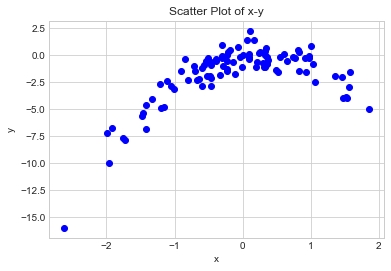

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(x, y, 'o', color='blue');
plt.title('Scatter Plot of x-y')
plt.xlabel('x')
plt.ylabel('y')

## b) The scatter plot of x and y shows the polynomial relationship between x and y. From the data generating equation it is clear that y is a quadratic functiion of x. We can see y changing as quardratic of x (parabolic shape).

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In [37]:
shuffle_index = np.random.permutation(100)
x1,y1 = x[shuffle_index],y[shuffle_index]
print(x1,y1)

[-0.32766215 -0.60063869  0.93128012 -0.60170661 -0.21967189  0.31424733
  1.03099952  0.08704707 -0.46341769  0.54256004  0.64768854  0.32875111
 -0.46063877  0.00511346 -0.8084936   1.47789404 -1.15099358 -0.64511975
 -0.50175704 -0.676922    0.73846658  1.0035329  -0.23458713 -1.19620662
 -0.51827022  0.49671415 -0.71984421 -0.46572975 -1.46351495  0.0675282
 -0.07201012  1.46564877 -1.05771093  0.09707755  0.37569802 -1.95967012
  0.26105527 -0.90802408  0.36139561  0.91540212 -0.29900735  0.19686124
  0.82254491 -0.29169375 -0.03582604  0.35711257  0.33126343  1.52302986
 -0.70205309 -0.23415337 -0.47917424 -0.3011037   0.09176078  0.29612028
  0.2088636  -0.39210815  0.61167629 -2.6197451  -0.23413696  0.96864499
 -0.38508228  0.34361829  1.56464366 -1.98756891  0.36163603 -0.2257763
 -0.18565898  1.53803657 -0.30921238 -0.5297602   0.32408397 -1.10633497
  1.85227818  1.35624003 -1.72491783  0.8219025  -1.91328024 -0.56228753
  0.76743473  0.81252582 -1.4123037  -1.47852199 -1.2

In [38]:
df = [x1,y1]
print(df)

[array([-0.32766215, -0.60063869,  0.93128012, -0.60170661, -0.21967189,
        0.31424733,  1.03099952,  0.08704707, -0.46341769,  0.54256004,
        0.64768854,  0.32875111, -0.46063877,  0.00511346, -0.8084936 ,
        1.47789404, -1.15099358, -0.64511975, -0.50175704, -0.676922  ,
        0.73846658,  1.0035329 , -0.23458713, -1.19620662, -0.51827022,
        0.49671415, -0.71984421, -0.46572975, -1.46351495,  0.0675282 ,
       -0.07201012,  1.46564877, -1.05771093,  0.09707755,  0.37569802,
       -1.95967012,  0.26105527, -0.90802408,  0.36139561,  0.91540212,
       -0.29900735,  0.19686124,  0.82254491, -0.29169375, -0.03582604,
        0.35711257,  0.33126343,  1.52302986, -0.70205309, -0.23415337,
       -0.47917424, -0.3011037 ,  0.09176078,  0.29612028,  0.2088636 ,
       -0.39210815,  0.61167629, -2.6197451 , -0.23413696,  0.96864499,
       -0.38508228,  0.34361829,  1.56464366, -1.98756891,  0.36163603,
       -0.2257763 , -0.18565898,  1.53803657, -0.30921238, -0.5

In [39]:
p_order = np.arange(1,5)
r_state = np.arange(0,4)

# LeaveOneOut CV
regr = skl_lm.LinearRegression()
loo = LeaveOneOut()
loo.get_n_splits(df)
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    x1_poly = poly.fit_transform(x1.reshape(-1,1))
    score = cross_val_score(regr, x1_poly,y1, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)
print(scores)

[-5.3029566276895945, -0.9127641950599265, -0.9569572977749526, -0.972772467279146]


Text(0, 0.5, 'Mean Squared Error')

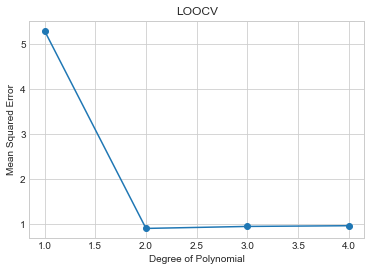

In [40]:
ax1 = plt
ax1.plot(p_order, np.array(scores)*-1, '-o')
ax1.title('LOOCV')
ax1.xlabel('Degree of Polynomial')
ax1.ylabel('Mean Squared Error')

## c) with different seed

In [41]:
shuffle_index = np.random.permutation(100)
x2,y2 = x[shuffle_index],y[shuffle_index]
print(x2,y2)

[ 0.00511346  0.96864499  0.2088636  -1.47852199  1.0035329  -0.2257763
 -1.4123037  -0.29169375  1.47789404 -0.23413696  0.73846658  0.34361829
 -1.72491783 -1.10633497 -1.91328024  0.61167629 -1.15099358  0.93128012
 -0.70205309  1.03099952 -2.6197451   0.09707755  0.37569802  0.31424733
 -1.95967012 -0.29900735 -1.22084365 -0.46063877 -1.19620662  1.56464366
 -0.46947439 -0.23415337  0.17136828  1.46564877 -0.54438272  0.35711257
 -0.46341769  0.09176078  1.57921282 -0.50175704  0.33126343  0.97554513
 -0.676922   -0.83921752  0.76743473  0.11092259 -1.01283112 -0.5297602
  0.36139561  1.53803657 -0.07201012  0.29612028 -0.71984421 -0.60170661
  0.81252582  0.24196227 -0.60063869 -0.3011037   1.35624003 -0.51827022
  0.19686124 -1.98756891 -0.21967189  0.64768854 -0.03582604 -0.11564828
  0.32408397 -0.47917424 -0.64511975 -0.23458713  0.82254491 -1.76304016
 -0.46572975  0.08704707  1.85227818 -0.1382643  -1.42474819 -1.46351495
  1.52302986  0.91540212  0.49671415 -0.30921238 -0.9

In [42]:
df1 = [x2,y2]

In [43]:
p_order = np.arange(1,5)
r_state = np.arange(0,4)

# LeaveOneOut CV
regr = skl_lm.LinearRegression()
loo = LeaveOneOut()
loo.get_n_splits(df1)
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    x2_poly = poly.fit_transform(x2.reshape(-1,1))
    score = cross_val_score(regr, x2_poly,y2, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)

print(scores)

[-5.302956627689594, -0.9127641950599251, -0.9569572977749509, -0.9727724672791467]


Text(0, 0.5, 'Mean Squared Error')

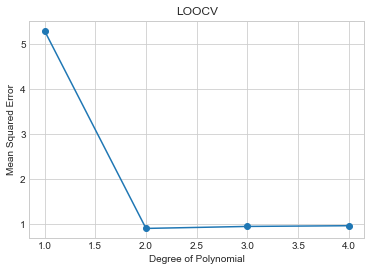

In [44]:
ax2 = plt
ax2.plot(p_order, np.array(scores)*-1, '-o')
ax2.title('LOOCV')
ax2.xlabel('Degree of Polynomial')
ax2.ylabel('Mean Squared Error')

## e) The second degree polynomial in x has the smallest MSE or LOOCV error. Yes, that is what we expected. Because, the data is generated using second degree polynomial in x. Hence, regression with first degree polynomial results in high MSE. On the other hand, 3 and 4 degree polynomials overfit the data, hence have higher MSE than 2nd degree polynomial. Therefore, MSE is lowest for 2 degree polynomial in x.

In [45]:
regr1 = skl_lm.LinearRegression()
p_order = np.arange(1,5)
coeff = list()
intercept = list()
for i in p_order:
    poly = PolynomialFeatures(i)
    x1_poly = poly.fit_transform(x1.reshape(-1,1))
    regr1.fit(x1_poly,y1)
    coeff.append(regr1.coef_)
    intercept.append(regr1.intercept_)

In [46]:
print("coefficients:",coeff)
print("\nintercepts:",intercept)

coefficients: [array([0.       , 1.5888784]), array([ 0.        ,  0.9242567 , -1.81557005]), array([ 0.        ,  0.8642927 , -1.79306238,  0.02836644]), array([ 0.        ,  1.01224805, -1.58846232, -0.0625832 , -0.06647838])]

intercepts: [-1.5711550292824903, -0.13814114804627042, -0.15207309767535437, -0.20780594298631683]


## f) From the coefficient array it is clear that absolute value of x^2 coefficient i.e. β2 is greater than other degree coefficients, i.e. β1, β3, and β4. Hence, we can say that change in y depends more on x^2 than other degrees of x, i.e. x, x^3, and x^4. This is evident from dataset generating function which is a 2nd degree polynomial in x. 